# 3.1 Stirling Engine

## Video Introduction

(A new cell below will contain a 5-8 minute video on the experiment, showing the Stirling engine in operation.)

## Major Ideas

### 1. Heat Engine
Heat engines are thermo-mechanical systems that convert some of the internal energy of a working material (usually a fluid) into useful work. Modeling the performance of heat engines uses a variety of points of view, including state-space descriptions that assume the system is near equilibrium as it progresses through a cycle between contact with high and low temperature baths, and non-equilibrium models that describe heat transport, mass transport, etc.### 2. Regenerator
A key component of the Stirling-cycle engine is a structure called the regenerator. After the working fluid (in our case, air) expands at constant high temperature, the regenerator captures and stores some of the internal energy when the working fluid has its temperature reduced at constant volume. After a following step of isothermal compression of the working fluid in contact with a cooled surface the regenerator returns some of the recovered energy to the working fluid when the fluid has its temperature increased again at a lower constant volume. The result is an improved efficiency since less thermal energy is discarded to the low temperature bath. Note: the conditions of constant volume or constant temperature are idealizations; nonetheless, the cycle and the regenerator are practical realizations that create a working engine with (thanks to the regenerator) improved efficiency.

## Major Equipment

### 1. Expansion/Compression Cylinder and Mechanical Drive Linkages

The system consists of a cleverly-designed transparent expansion/compression cylinder with electrical heat source and circulating coolant, along with linkages that translate the reciprocating motion into circular motion of a flywheel and, if desired, coupling to mechanisms that do useful work.

### 2. Sensor System for Computer-Aided Acquisition of State Variable Time Series

A system of sensors is employted to measure parameters from which state variables can be determined, including computer-based data acqisition for sampling the sensor measurements at many points through each cycle of the heat engine.

## Data Analysis
### 1. Computing area enclosed by a set of discrete data points
--
### 2. (To be determined)
--

# Week 1 Pre-Lab: Physical system modeling
Complete this before your first session in the lab. It is a good idea to go into the lab ahead of your actual working session and get a preview look at the apparatus while doing these exercises.

## Characterizing the Ideal Stirling Cycle 

### Estimating the number of moles, mass, and heat capacity of the air in the system
If the working fluid (air) of the system starts at room pressure $p_{room}$, maximum volume $V_{max}$ and temperature $T_{cold}$ what is the number of moles $n$ ? (Hint: the molar gas constant is $R$.)

In order to quantitatively explore the above question the following python cell will prompt you for four pieces of information:
1. The "cold" temperature, i.e. the temperature of the water bath.
2. The maximum volume of the working fluid, when the working piston is fully pushed out.
3. The local room pressure, which we will assume to be the pressure of the working fluid (air) when cold and at maximum volume inside the Stirling engine cyliner.
4. The elevation of Denver in meters (needed to provide pressure corrections).

To begin with, you can just estimate a reasonable value for the water bath temperature and then come back later to re-explore this section with an updated value from the experiment. 

To obtain an estimate of the maximum working fluid volume, see the apparatus documentation at http://www.ld-didactic.de/documents/en-US/GA/GA/3/388/388182e.pdf While you are looking at the apparatus specifications, also take note of the minimum working fluid volume.

There are two ways to obtain local barometric pressure. Use the first method for now and later when you are in the lab use the second method for comparison.
1. Look up the regional atmospheric pressure online. Here is a link to the current weather for Colorado: http://www.weather.gov/bou/ . Click on the map where you are located and find the barometric pressure in the resulting display. The problem is that the reported pressure is adjusted to sea-level equivalent using a model for the altitude dependence. This adjustment must be undone in the code below to estimate the actual room pressure. *To make this correction, you will also need to find the altitude $h$ of your location.*
2. *(Later in the lab)* Manually turn the flywheel until the working piston is at the bottom to give maximum volume and the displacement piston is raised so that most of the air is in the cold region of the cylinder. We will call this point "c" in the cycle. Directly measure the pressure using the sensor system and compare this to the value that you looked up, adjusted for altitude in the python code.

### STUDENT NOTES
In this cell, type in the values that you think you will use for bath temperature, maximum and minimum air volume of the engine cyclinder, sea-level equivalent of the local pressure, and local elevation. (You will need the minimum volume later...)




### STUDENT INPUT

In the remainder of this cell, typeset symbolic formulas for:
1. The number of moles of air given the volume, temperature, and pressure.
2. The heat capacity at constant volume of the predicted quantity of air. (Hint: what kind of molecules make up the air and what does this imply about the heat capacity?)

### STUDENT NUMERICAL EXPLORATION
Run the code in the following cell, answering the prompts with the information that you obtained above, and obtain numerical estimates of the number of moles and the heat capacity. You are encouraged to explore a bit using different choices of parameters, but ultimately leave the output for your "best guess" of parameter values that describe the actual experiment.

In [1]:
# Code to estimate number of moles, mass, and heat capacity of the working volume of air
# DO NOT EDIT

R = 8.3144598 # molar gas constant in joules / (mole kelvin)
T0 = 273.15 # equivalent of 0°C in kelvin
airmolmass = 28.950 # weighted average of molecular mass of air

Tcold = float(input('What is the cooling jacket water temperature in °C? '))
Vmax = 1E-6*float(input('What is the maximum volume in cm^3? ')) # convert to m^3
proomSL = float(input('What is the current sea-level adjusted barometric pressure in mBar? '))
h = float(input('What is the elevation of your location in meters?  '))

# Now caculate the actual pressure for local altitude and current temperature.
# See http://keisan.casio.com/exec/system/1224579725
proom = 1.0E2*proomSL*(1-(0.0065*h)/(Tcold+T0+0.0065*h))**5.257 # formula for pressure conversion.
print(' ') #leave a blank liine
print('Predicted cold pressure at max volume is {0:.0f} Pa.'.format(proom))

# Estimate the number of moles using the ideal gas law, maximum volume, 
# pressure at point c equal to ambient room pressure, and cooling jacket water temperature.
pc = proom
nmoles = pc*Vmax/(R*(T0+Tcold))
print('Number of moles of air is {0:0.6f} moles.'.format(nmoles))

# Compute the corresponding mass
airmass = nmoles*airmolmass
print('Mass of air is {0:0.4f} grams.'.format(airmass))

# Compute the heat capacity at constant volume (assuming all molecules are diatomic)
Cvair = 5./2*nmoles*R
print('Heat capacity of air at constant volume = {0:0.4f} joules/K.'.format(Cvair))

What is the cooling jacket water temperature in °C? 20
What is the maximum volume in cm^3? 350
What is the current sea-level adjusted barometric pressure in mBar? 1018
What is the elevation of your location in meters?  1100
 
Predicted cold pressure at max volume is 89687 Pa.
Number of moles of air is 0.012879 moles.
Mass of air is 0.3728 grams.
Heat capacity of air at constant volume = 0.2677 joules/K.


### STUDENT INTERPRETATION
Notice how little material substance is actually used to effectively transduce thermal energy into what you will soon observe in the lab as mechanical motion of piston, piston rods, cams, crankshaft, and a massive flywheel. Let's make a comparison to better appreciate the quantities involved.. In the remainder of this cell, type the corresponding values of moles, mass, and heat capacity for 1 cubic centimeter of liquid water at room temperature.







### Estimating the cold compressed pressure, the work of compression, and the heat removed


Manually rotate the flywheel so that the air is compressed by the working piston while the air remains mostly in the cold region (i.e. the displacement piston does not move much). Call this point "d" in the cycle. Watch what happens to the pressure sensor reading. What would you predict the pressure reading to be, assuming that the compression is done isothermally? 

The documentation says that the minimum volume is about 200 cc.

In [2]:
from math import *
Vmin = 1E-6*float(input("What is the minimum volume in cm^3? ")) # convert to m^3
pd=pc*Vmax/Vmin
print('Predicted compressed pressure is {0:.0f} Pa.'.format(pd))
Wcomp = nmoles*R*(Tcold+T0)*log(Vmax/Vmin)
print('Predicted work of compression is {0:.1f} joules.'.format(Wcomp))
Qcomp = Wcomp
print('Predicted thermal energy given to cooling bath is {0:.1f} joules.'.format(Qcomp))

What is the minimum volume in cm^3? 200
Predicted compressed pressure is 156953 Pa.
Predicted work of compression is 17.6 joules.
Predicted thermal energy given to cooling bath is 17.6 joules.


### Estimating the highest working fluid temperature achieved

After the cold working fluid is compressed isothermally (by removing the heat caused by the compression), the next step in preparing the system for operation is to displace the working fluid to the hot end of the cylinder. At this end, an electric heater is operated at a power level that you will set using a transformer to apply a known voltage $V_{heater}$. Later, during the experiment you will also measure the current $I_{heater}$.

Let's assume that the air is put into contact with a heater running at a power of $P_{heater}$ watts for a time $t_{startup}$. What are the expected final temperature $t_{hot}$ and pressure $p_a$?

For example, the power might be 12 watts and the startup heating time might be 20 seconds.

In [3]:
Pheater = float(input("What is the heater input power in watts? "))
tstartup = float(input("What is the startup heating time in seconds? "))
Qstartup = Pheater*tstartup
print('Computed startup thermal energy is {0:.0f} joules.'.format(Qstartup))
Qisochor = Qstartup #assume that the startup heating will also be the heat applied each time
# the gas is displaced at constant volume (isochor) through the regenerator to the hot region
Thot = Tcold+Cvair*Qisochor
print('Estimated hot gas temperature is {0:.1f} °C.'.format(Thot))
pa = pd*((Thot+T0)/(Tcold+T0))
print('Estimated hot gas pressure is {0:.0f} Pa.'.format(pa))

What is the heater input power in watts? 12
What is the startup heating time in seconds? 20
Computed startup thermal energy is 240 joules.
Estimated hot gas temperature is 84.2 °C.
Estimated hot gas pressure is 191351 Pa.


 Then manually rotate the flywheel further so that the displacement piston pushes most of the air to the end of the cylinder containing the heater. Turn on the heater for about 30 seconds and watch what happens to the pressure. Then give the flywheel a push to hopefully set the heat engine into continuous function.

In [4]:
# Now calculate work done in isothermal expanson
Wexp = nmoles*R*(Thot+T0)*log(Vmax/Vmin)
print('Predicted work of expansion is {0:.1f} joules.'.format(Wexp))
Qexp = Wexp
print('Predicted thermal energy absorbed from heater is {0:.1f} joules.'.format(Qexp))

Predicted work of expansion is 21.4 joules.
Predicted thermal energy absorbed from heater is 21.4 joules.


/Applications/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Applications/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


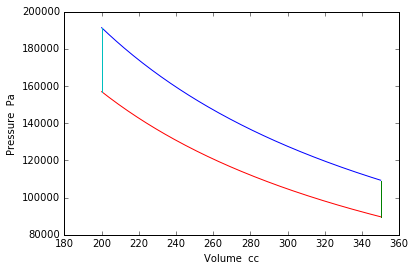

In [5]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
Vmincc=1E6*Vmin # convert cubic meters to cubic centimeters
Vmaxcc=1E6*Vmax # convert cubic meters to cubic centimeters
vab = np.arange(Vmincc,Vmaxcc,1)
pab = pa*Vmincc/vab
# Recall that pc was assumed to be proom, the pressure in the lab room
pb = pc*(Thot+T0)/(Tcold+T0)
pbc = np.arange(pc,pb,1000)
npbc= len(pbc)
vbc = Vmaxcc*np.ones(npbc)
vdc = vab
pdc = pd*Vmincc/vdc
pda = np.arange(pd,pa,1000)
npda = len(pda)
vda = Vmincc*np.ones(npda)
plt.plot(vab,pab,vbc,pbc,vdc,pdc,vda,pda)
plt.xlabel('Volume  cc')
plt.ylabel('Pressure  Pa')
plt.show()

In [7]:
# Now calculate efficiency.
regeneff = 0.01*float(input("What is the %effectiveness of the regenerator? "))
Wnet = Wexp-Wcomp # net work done
Qnet = Qexp+(1-regeneff)*Qisochor
Carnoteff = 1-(Tcold+T0)/(Thot+T0)
Actualeff = Wnet/Qnet
print('Net work done in one cycle is {0:0.1f} joules'.format(Wnet))
print('Net heat absorbed in one cycle is {0:0.1f} joules'.format(Qnet))
print('Carnot efficiency is {0:.1f} %.'.format(100*Carnoteff))
print('Actual efficiency is {0:.1f} %.'.format(100*Actualeff))
print('Predicted heating time is {0:0.2f} seconds.'.format(Qnet/Pheater))

What is the %effectiveness of the regenerator? 0
Net work done in one cycle is 3.8 joules
Net heat absorbed in one cycle is 261.4 joules
Carnot efficiency is 18.0 %.
Actual efficiency is 1.5 %.
Predicted heating time is 21.78 seconds.


In [8]:
ccopper = 0.385 # J/gK specific heat of copper at 25°C
mcopper = float(input('What is the estimated mass of the copper regenerator in grams? '))
Cregen = mcopper*ccopper
print('Estimated heat capacity of copper regenerator Cregen = {0:0.4f} joules/K.'.format(Cregen))
print('Heat capacity ratio Cvair/Cregen = {0:0.5f}'.format(Cvair/Cregen))

What is the estimated mass of the copper regenerator in grams? 10
Estimated heat capacity of copper regenerator Cregen = 3.8500 joules/K.
Heat capacity ratio Cvair/Cregen = 0.06953


Here is a link to the current weather to obtain sea-level adjusted barometric pressure:
http://www.weather.gov/bou/ .
Click on the map where Denver is located and find the barometric pressure in the resulting display.

In [38]:
mweighted = 0.7809*28.013+.2095*31.999+0.0093*39.948
print(mweighted)
n=1000/mweighted
nN2=n*.7809
nO2=n*.2095
nAr=n*0.0093
print(n,nN2,nO2,nAr)
CV=(5./2)*(nN2+nO2)*R+(3./2)*nAr
print("CV=",CV)
CP=(7./2)*(nN2+nO2)*R+(5./2)*nAr
print("CP=",CP)

28.950658600000004
34.54152853020069 26.97347962923372 7.236450227077044 0.3212362153308664
CV= 711.5745707007854
CP= 996.3328934672319


In [16]:
m=27.17*28+7.29*32+.32*18
print(m)

999.8
